In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import SelectKBest, f_regression

In [5]:
df = pd.read_csv("weatherHistory.csv")

In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [8]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [10]:
numeric_cols = df.select_dtypes(include=["int64","float64"])
skewness = df[numeric_cols.columns].skew()
skewness

Temperature (C)             0.094127
Apparent Temperature (C)   -0.057302
Humidity                   -0.715880
Wind Speed (km/h)           1.113493
Wind Bearing (degrees)     -0.154643
Visibility (km)            -0.498712
Loud Cover                  0.000000
Pressure (millibars)       -8.422506
dtype: float64

In [11]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [12]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

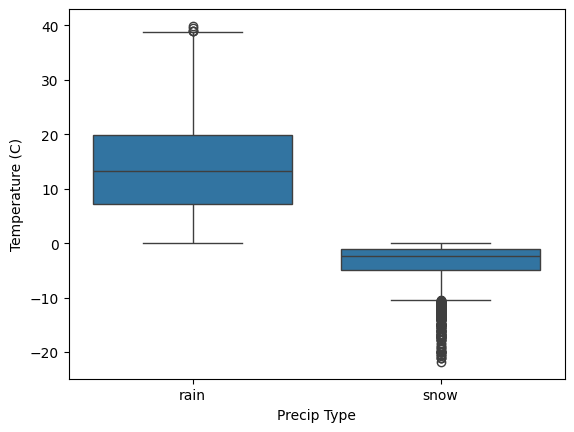

In [13]:
sb.boxplot(x='Precip Type', y='Temperature (C)', data=df)

In [14]:
def impute_precip(row):
    if pd.isna(row['Precip Type']):
        return 'snow' if row['Temperature (C)'] < 0 else 'rain'
    return row['Precip Type']

df['Precip Type'] = df.apply(impute_precip, axis=1)

In [15]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

**Solving for Outliers in Data**

In [16]:
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

df[numeric_cols.columns] = np.where(
   df[numeric_cols.columns] < lower_bound,
    lower_bound,
    np.where(
        df[numeric_cols.columns] > upper_bound,
        upper_bound,
        df[numeric_cols.columns]
    )
)

In [17]:
df.drop(columns=['Loud Cover'], inplace=True)

In [18]:
numeric_cols = df.select_dtypes(include=["int64","float64"])
skewness = df[numeric_cols.columns].skew()
skewness

Temperature (C)             0.096933
Apparent Temperature (C)   -0.056301
Humidity                   -0.711022
Wind Speed (km/h)           0.703952
Wind Bearing (degrees)     -0.154643
Visibility (km)            -0.498712
Pressure (millibars)        0.008807
dtype: float64

In [19]:
df['Wind Speed (km/h)'] = np.sqrt(df['Wind Speed (km/h)'])
df['Humidity'] = df['Humidity'] ** 2

In [20]:
numeric_cols = df.select_dtypes(include=["int64","float64"])
skewness = df[numeric_cols.columns].skew()
skewness

Temperature (C)             0.096933
Apparent Temperature (C)   -0.056301
Humidity                   -0.293619
Wind Speed (km/h)          -0.204756
Wind Bearing (degrees)     -0.154643
Visibility (km)            -0.498712
Pressure (millibars)        0.008807
dtype: float64

C:\Users\Pst John\AppData\Local\Temp\ipykernel_12996\3159711964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],kde=True,bins=30,color='orange')


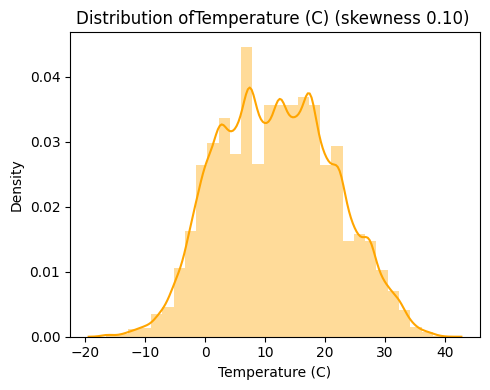

C:\Users\Pst John\AppData\Local\Temp\ipykernel_12996\3159711964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],kde=True,bins=30,color='orange')


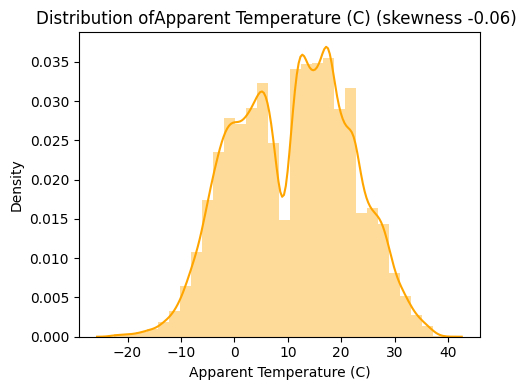

C:\Users\Pst John\AppData\Local\Temp\ipykernel_12996\3159711964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],kde=True,bins=30,color='orange')


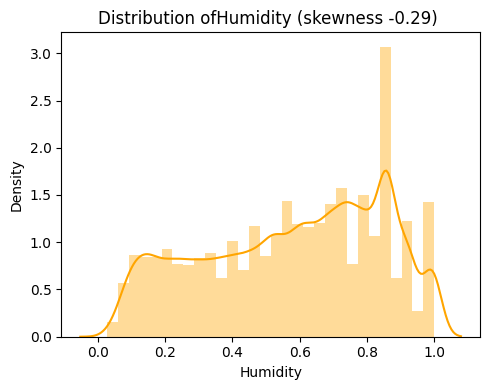

C:\Users\Pst John\AppData\Local\Temp\ipykernel_12996\3159711964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],kde=True,bins=30,color='orange')


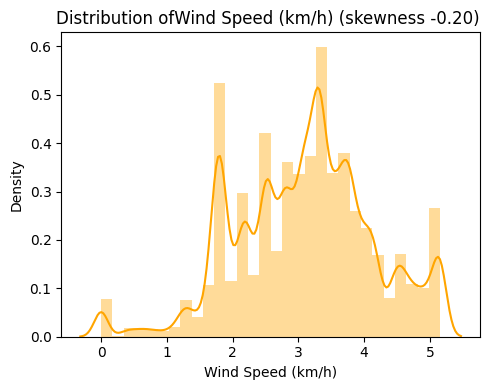

C:\Users\Pst John\AppData\Local\Temp\ipykernel_12996\3159711964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],kde=True,bins=30,color='orange')


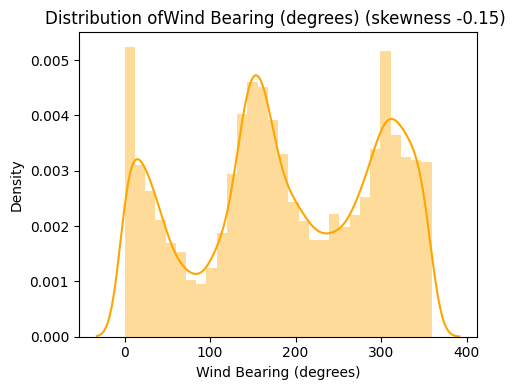

C:\Users\Pst John\AppData\Local\Temp\ipykernel_12996\3159711964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],kde=True,bins=30,color='orange')


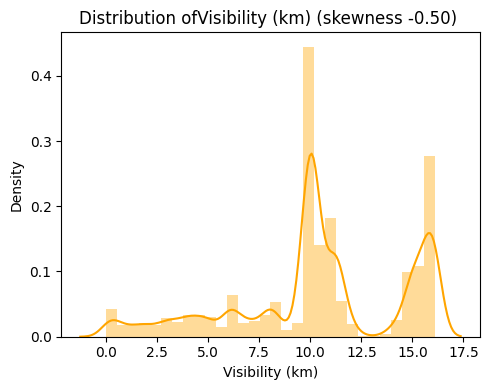

C:\Users\Pst John\AppData\Local\Temp\ipykernel_12996\3159711964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],kde=True,bins=30,color='orange')


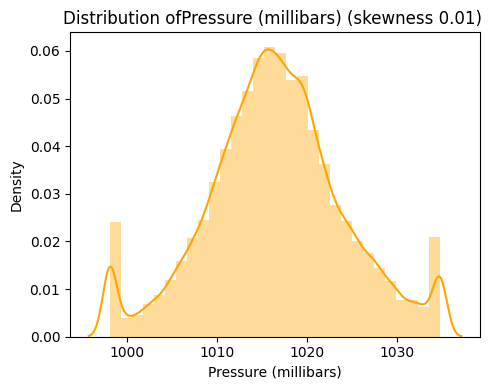

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sb.distplot(df[col],kde=True,bins=30,color='orange')
    skew_val = df[col].skew()
    plt.title(f"Distribution of{col} (skewness {skew_val:.2f}) ")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

In [22]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [23]:
df['hour'] = df['Formatted Date'].dt.hour
df['month'] = df['Formatted Date'].dt.month
df['weekday'] = df['Formatted Date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [24]:
df['wind_sin'] = np.sin(np.radians(df['Wind Bearing (degrees)']))
df['wind_cos'] = np.cos(np.radians(df['Wind Bearing (degrees)']))
df.drop(columns=['Wind Bearing (degrees)'], inplace=True)


In [25]:
df['Precip Type'] = df['Precip Type'].map({'rain': 1, 'snow': 0})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               96453 non-null  int64              
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Visibility (km)           96453 non-null  float64            
 8   Pressure (millibars)      96453 non-null  float64            
 9   Daily Summary             96453 non-null  object             
 10  hour                      96453 non-null  int32              
 11  month          

In [27]:
df = pd.get_dummies(df, columns=['Summary'], drop_first=True)

In [28]:
df.drop(columns=['Daily Summary'], inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   Formatted Date                               96453 non-null  datetime64[ns, UTC]
 1   Precip Type                                  96453 non-null  int64              
 2   Temperature (C)                              96453 non-null  float64            
 3   Apparent Temperature (C)                     96453 non-null  float64            
 4   Humidity                                     96453 non-null  float64            
 5   Wind Speed (km/h)                            96453 non-null  float64            
 6   Visibility (km)                              96453 non-null  float64            
 7   Pressure (millibars)                         96453 non-null  float64            
 8   hour                      

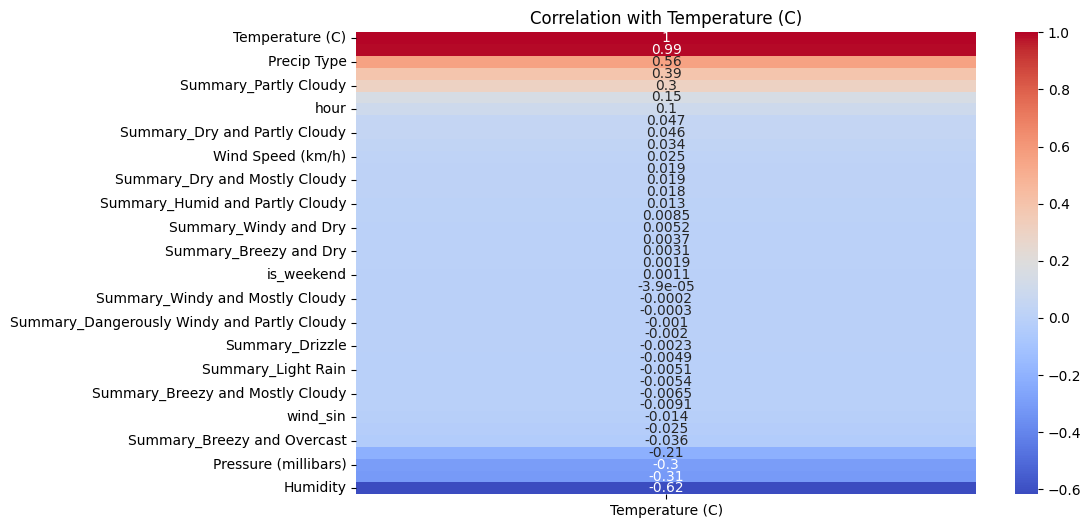

In [30]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(numeric_only=True)[['Temperature (C)']].sort_values(by='Temperature (C)', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Temperature (C)')
plt.show()


In [37]:
X = df.drop(columns=["Temperature (C)",'Formatted Date'])
y = df['Temperature (C)']
target = 'Temperature (C)'

In [39]:
selector =SelectKBest(score_func=f_regression,k=10)
x_selected = selector.fit_transform(X,y)

selected_column = X.columns[selector.get_support()]
selected_column

Index(['Precip Type', 'Apparent Temperature (C)', 'Humidity',
       'Visibility (km)', 'Pressure (millibars)', 'hour', 'month',
       'Summary_Foggy', 'Summary_Overcast', 'Summary_Partly Cloudy'],
      dtype='object')

In [40]:
df_selected = df[selected_column.to_list() + [target]]

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_selected.drop(columns=[target])
y = df_selected[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R² Score: 0.9882511008653854
RMSE: 1.0404589263868804


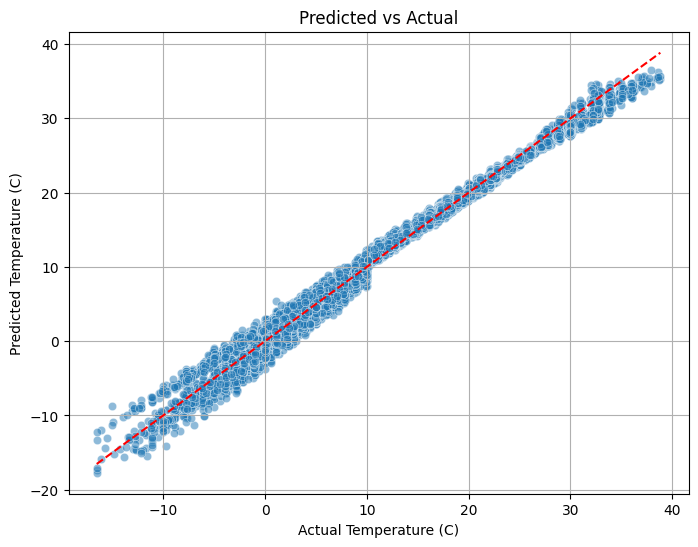

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Temperature (C)")
plt.ylabel("Predicted Temperature (C)")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()


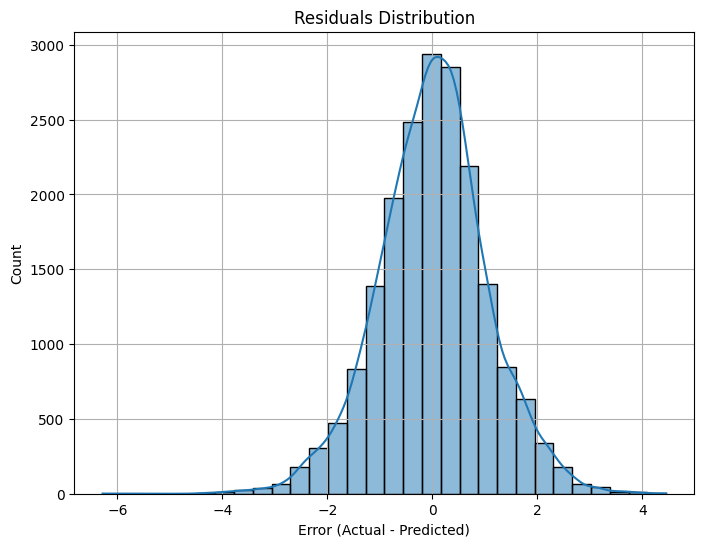

In [44]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.grid(True)
plt.show()


In [45]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("R² Train:", r2_train)
print("R² Test :", r2_test)


R² Train: 0.9880687608822974
R² Test : 0.9882511008653854
